**CREATING THE DATASET WITH MERGING MULTIPLE DATASETS**

In [ ]:
import pandas as pd

# Load CSV files
median = pd.read_csv("Median_sale_price.csv")
pct_above = pd.read_csv("Percent_of_homes_sold_above_list.csv")
rent = pd.read_csv("Zori_median_rent.csv")
market_heat = pd.read_csv("Market_heat.csv")
affordability = pd.read_csv("Affordability_years_to_save.csv")
sale_list=pd.read_csv("Mean_sale_to_list_ratio.csv")
new_cons_sale_price=pd.read_csv("New_con_median_sale_price.csv")

# Define a melt function
def melt_df(df, value_name):
    date_columns = df.columns[5:]
    melted = df.melt(
        id_vars=["RegionID", "RegionName", "RegionType", "StateName"],
        value_vars=date_columns,
        var_name="Date",
        value_name=value_name
    )
    melted["Date"] = pd.to_datetime(melted["Date"])
    return melted

# Melt each dataset
median_melted = melt_df(median, "MedianSalePrice")
pct_melted = melt_df(pct_above, "PctSoldAboveList")
rent_melted = melt_df(rent, "MedianRent")
market_heat_melted = melt_df(market_heat, "MarketHeatIndex")
affordability_melted = melt_df(affordability, "YearsToSave")
sale_list_melted = melt_df(sale_list, "SaleToListRatio")
new_cons_sale_price_melted = melt_df(new_cons_sale_price, "NewConMedianSalePrice")


# Merge datasets step by step
merged = median_melted.copy()
merged = merged.merge(pct_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])
merged = merged.merge(rent_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])
merged = merged.merge(market_heat_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])
merged = merged.merge(affordability_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])
merged = merged.merge(sale_list_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])
merged = merged.merge(new_cons_sale_price_melted, on=["RegionID", "RegionName", "RegionType", "StateName", "Date"])

print(merged.head())



   RegionID       RegionName RegionType StateName       Date  MedianSalePrice  \
0    102001    United States    country       NaN 2018-03-31         224719.0   
1    394913     New York, NY        msa        NY 2018-03-31         380000.0   
2    753899  Los Angeles, CA        msa        CA 2018-03-31         620000.0   
3    394463      Chicago, IL        msa        IL 2018-03-31         220000.0   
4    394514       Dallas, TX        msa        TX 2018-03-31         259000.0   

   PctSoldAboveList   MedianRent  MarketHeatIndex  YearsToSave  \
0          0.227457  1381.671080             53.0     7.355010   
1          0.201962  2451.857818             55.0    11.960819   
2          0.401445  2181.502665             66.0    17.404722   
3          0.157976  1568.020649             51.0     6.487640   
4          0.275308  1296.265759             59.0     6.979034   

   SaleToListRatio  NewConMedianSalePrice  
0         0.978256               321281.0  
1         0.975797          

**DATA CLEANING & PREPROCESSSING**

**MISSING VALUES**

Shape: (10500, 12)

 Column Types:
 RegionID                          int64
RegionName                       object
RegionType                       object
StateName                        object
Date                     datetime64[ns]
MedianSalePrice                 float64
PctSoldAboveList                float64
MedianRent                      float64
MarketHeatIndex                 float64
YearsToSave                     float64
SaleToListRatio                 float64
NewConMedianSalePrice           float64
dtype: object

 Missing values per column:
 NewConMedianSalePrice    1718
PctSoldAboveList          301
SaleToListRatio           291
MedianRent                191
StateName                  84
dtype: int64


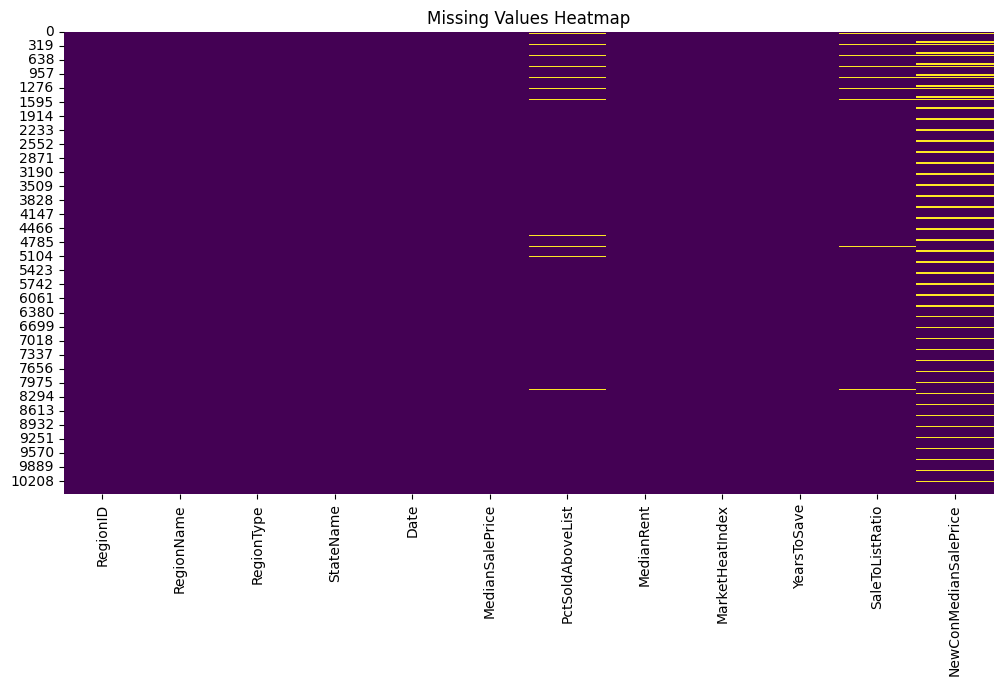


Rows before drop: 10500
Rows after drop (excluding only key variables): 9893

Duplicate Rows: 0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display dataset shape
print("Shape:", merged.shape)

# Show data types of all columns
print("\n Column Types:\n", merged.dtypes)

# Count missing values in each column
missing_values = merged.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\n Missing values per column:\n", missing_values)

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(merged.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Drop rows with missing values(not NewConMedianSalePrice)
core_columns = ["PctSoldAboveList", "SaleToListRatio", "MedianRent", "StateName"]
merged_cleaned = merged.dropna(subset=core_columns)

# Compare row counts before and after dropping missing data
print("\nRows before drop:", merged.shape[0])
print("Rows after drop (excluding only key variables):", merged_cleaned.shape[0])

# Check for duplicate rows in the dataset
print("\nDuplicate Rows:", merged.duplicated().sum())


**OUTLIERS**

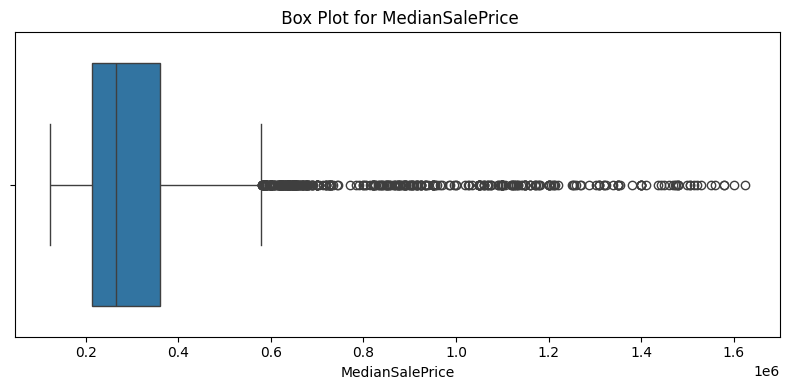

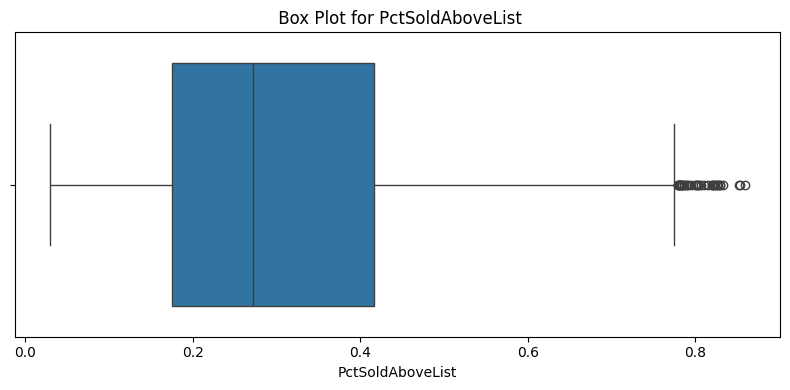

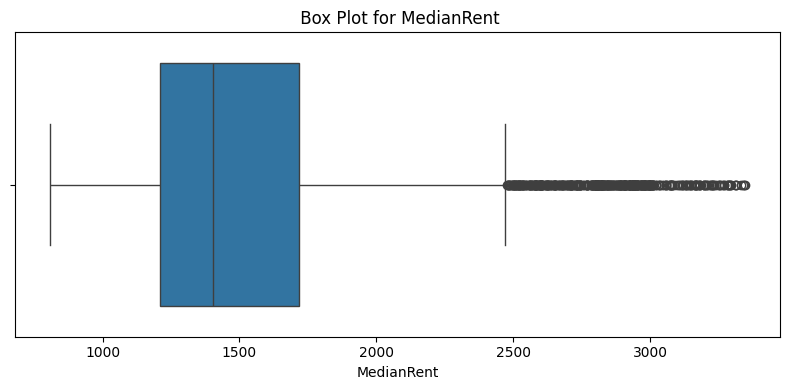

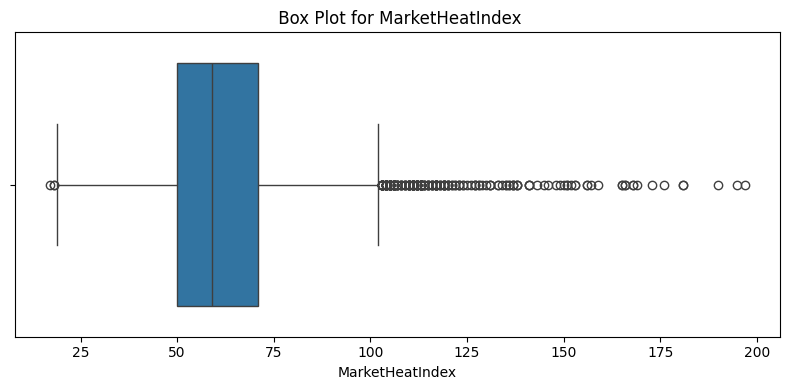

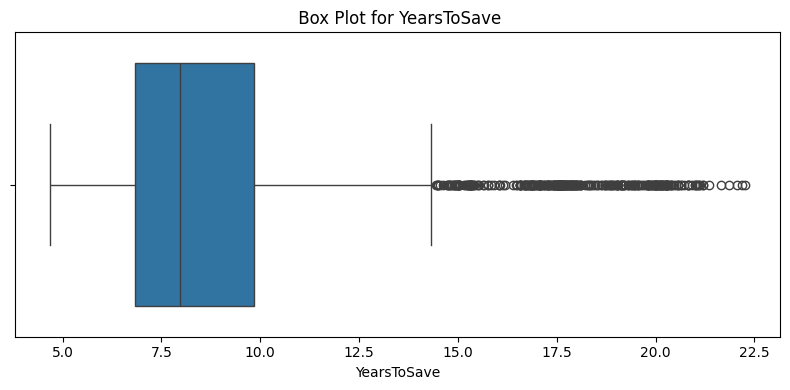

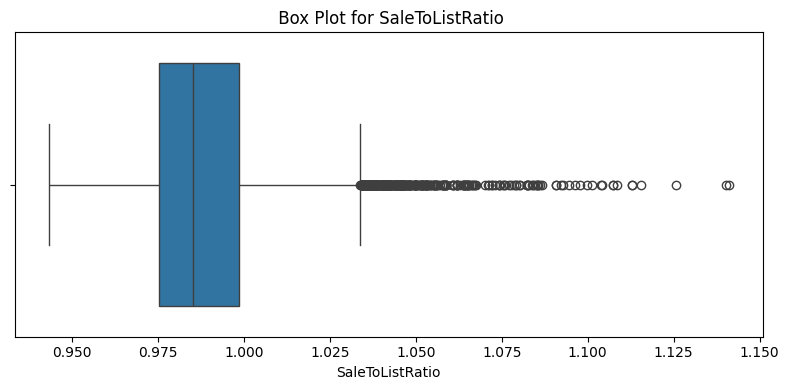

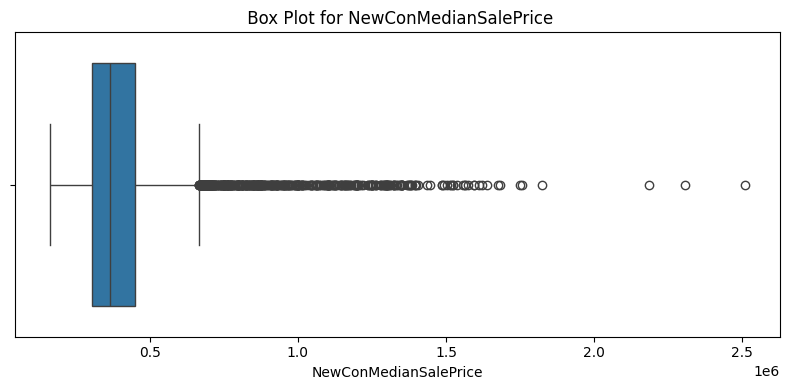

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = merged_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["RegionID"])

for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_cleaned[col])
    plt.title(f' Box Plot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**EXPLORATORY DATA ANALYSIS**

**HISTOGRAMS**

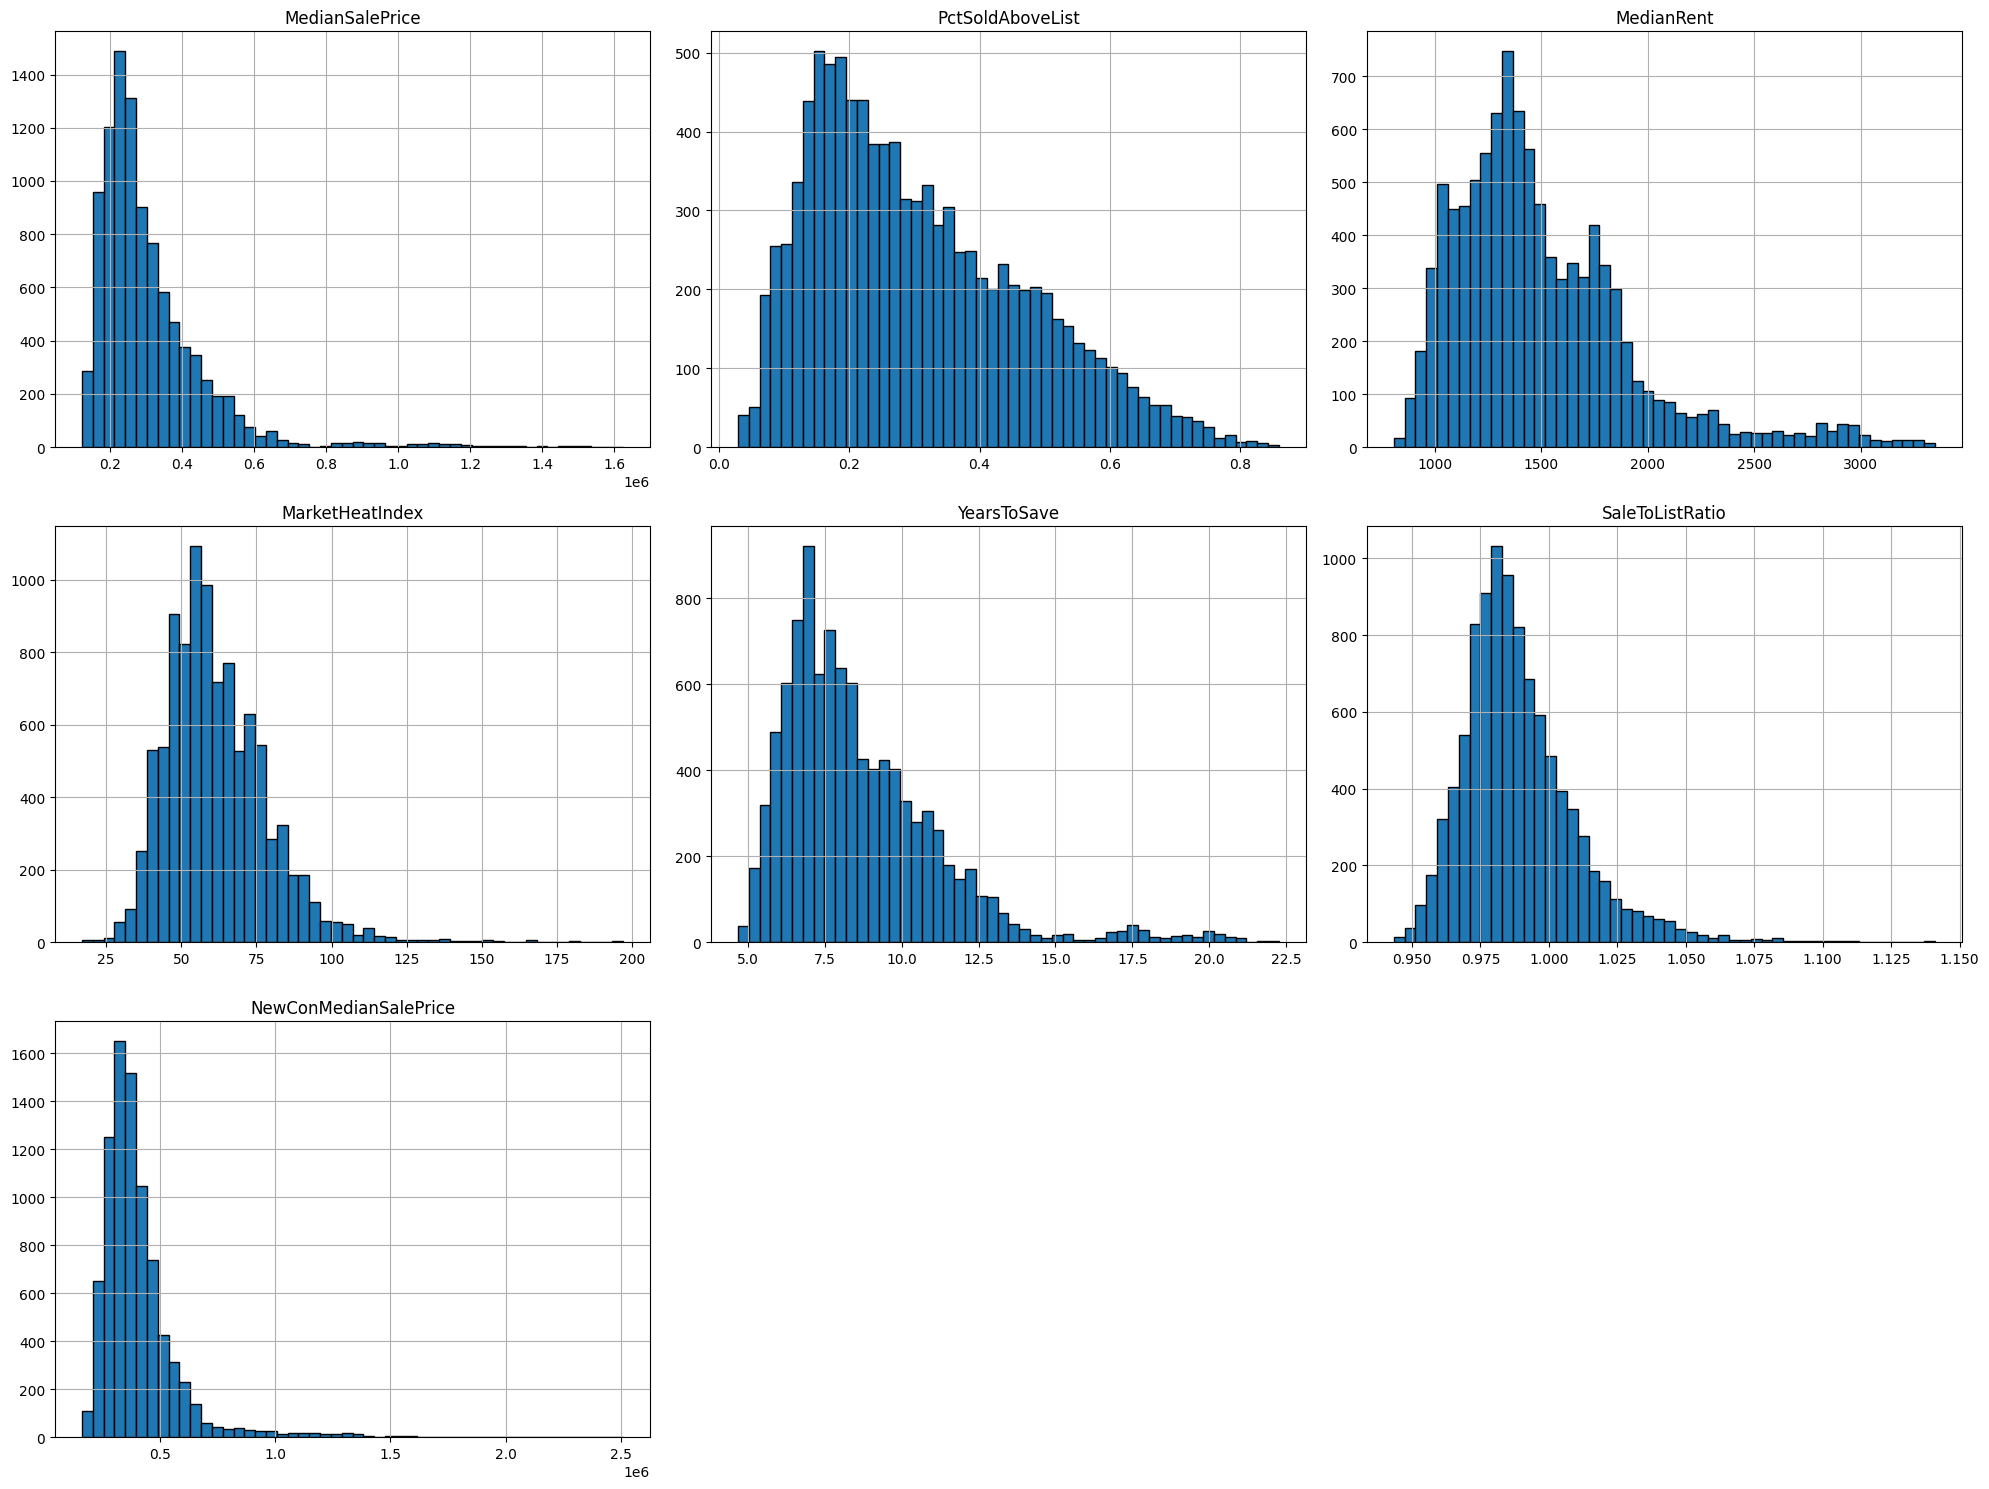

In [ ]:
# Histogram for numeric columns
numeric_cols = merged_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["RegionID"])

numeric_cols.hist(bins=50, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()

**DESCRIPTIVE STATISTICS**

In [ ]:
# Descriptive Statistics
desc_stats = merged_cleaned.describe()
print(desc_stats)


            RegionID                           Date  MedianSalePrice  \
count    9893.000000                           9893     9.893000e+03   
mean   406601.992621  2021-10-16 19:09:28.038006528     3.096715e+05   
min    394312.000000            2018-03-31 00:00:00     1.219750e+05   
25%    394531.000000            2020-01-31 00:00:00     2.131770e+05   
50%    394792.000000            2021-10-31 00:00:00     2.650000e+05   
75%    395005.000000            2023-07-31 00:00:00     3.599000e+05   
max    753912.000000            2025-02-28 00:00:00     1.625000e+06   
std     64112.991749                            NaN     1.627796e+05   

       PctSoldAboveList   MedianRent  MarketHeatIndex  YearsToSave  \
count       9893.000000  9893.000000      9893.000000  9893.000000   
mean           0.306217  1500.371539        61.627211     8.631004   
min            0.029102   806.913837        17.000000     4.670567   
25%            0.175565  1208.192870        50.000000     6.822396   
5

**CORRELATION MATRIX**


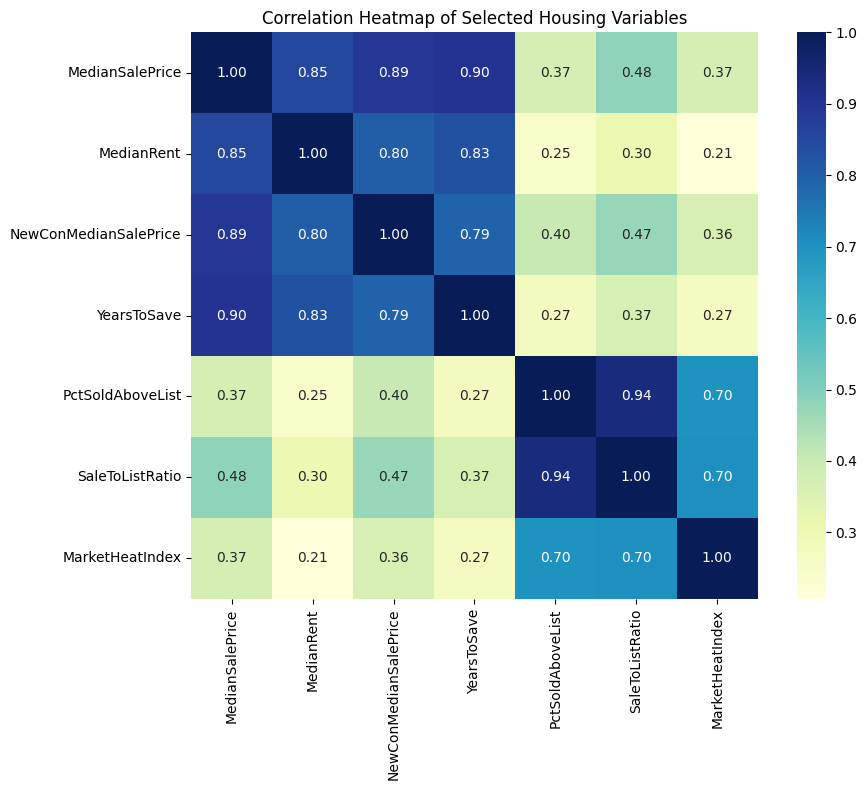

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for correlation analysis
selected_columns = [
    'MedianSalePrice', 'MedianRent', 'NewConMedianSalePrice',
    'YearsToSave', 'PctSoldAboveList', 'SaleToListRatio', 'MarketHeatIndex'
]

# Filter the dataframe to these columns (ensure they exist)
df_subset = merged_cleaned[selected_columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Selected Housing Variables")
plt.tight_layout()
plt.show()

**Q-Q PLOT**

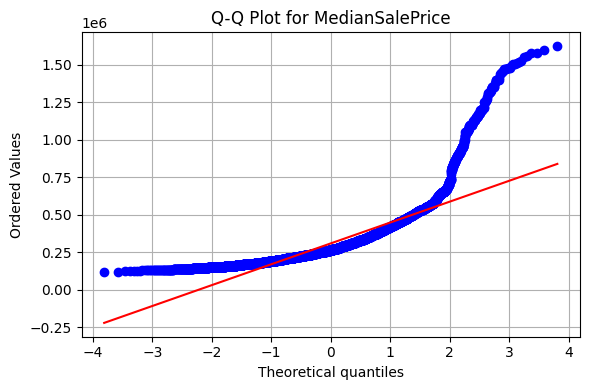

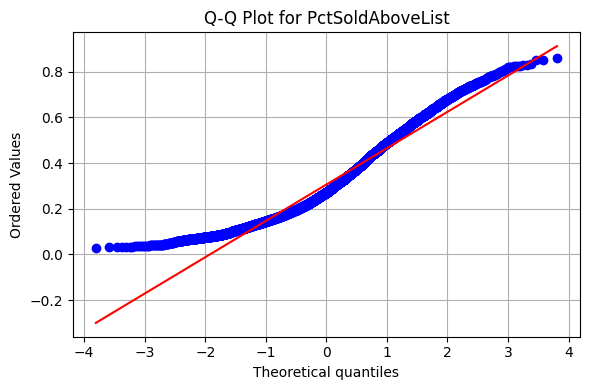

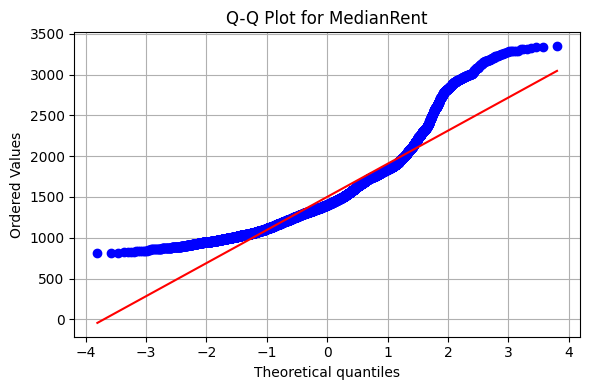

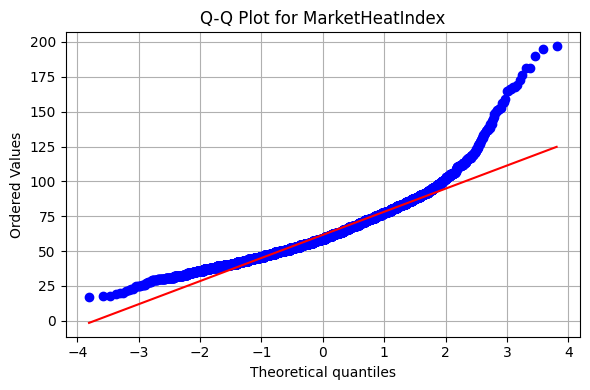

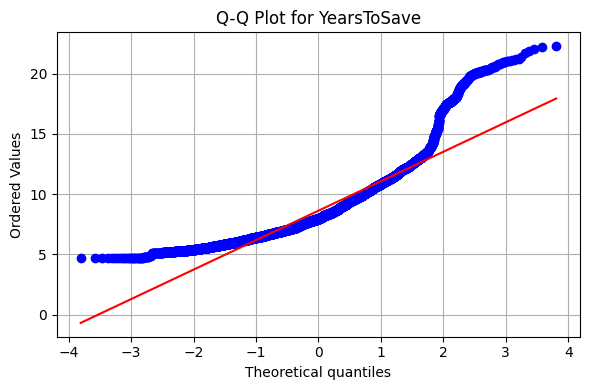

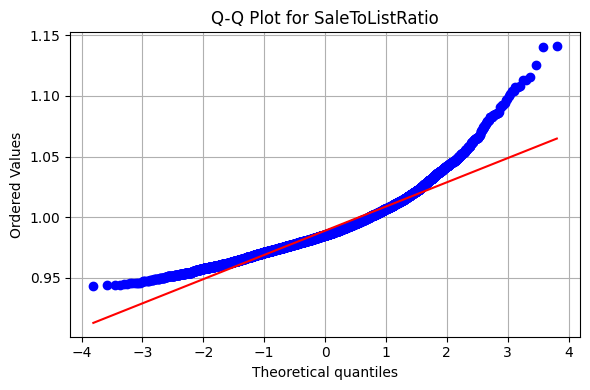

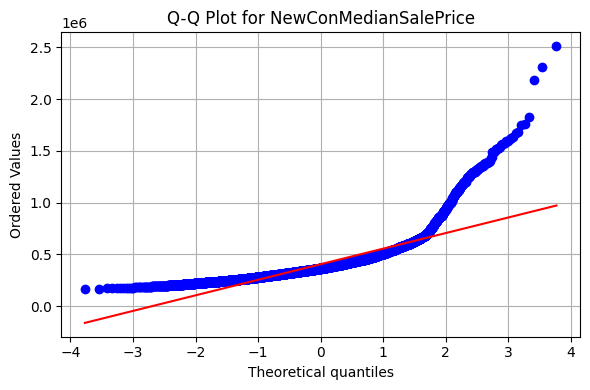

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Numeric columns
numeric_cols = merged_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=["RegionID"])

# Plot Q-Q plots for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(numeric_cols[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**TIME SERIES & PATTERN EXPLORATION**

<ipython-input-9-a2387d1a4fec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned["Date"] = pd.to_datetime(merged_cleaned["Date"])


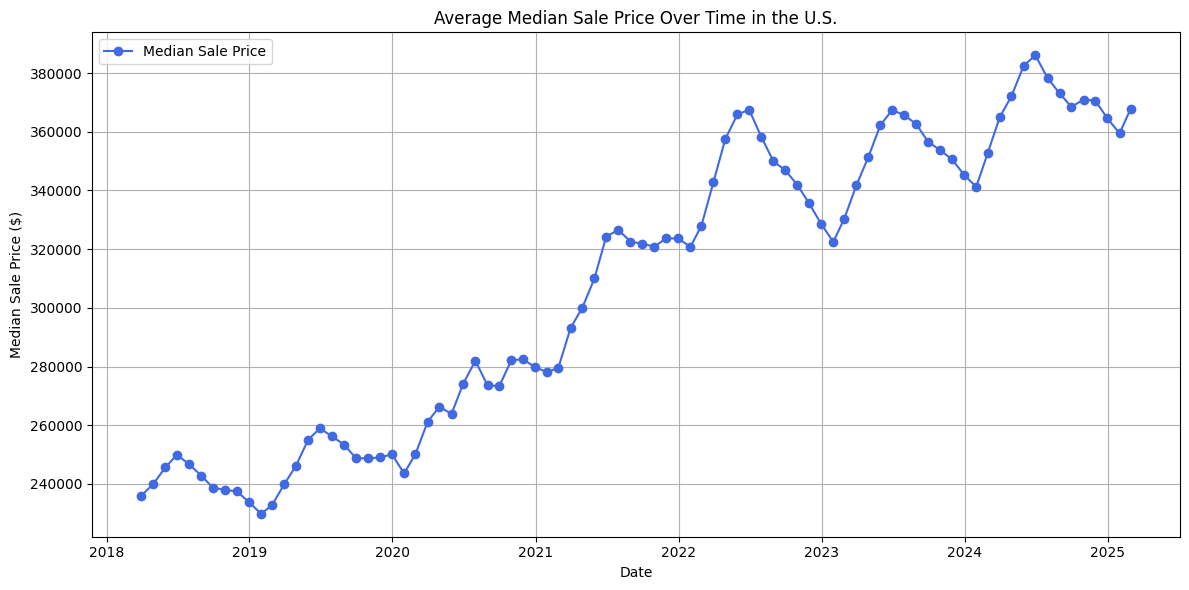

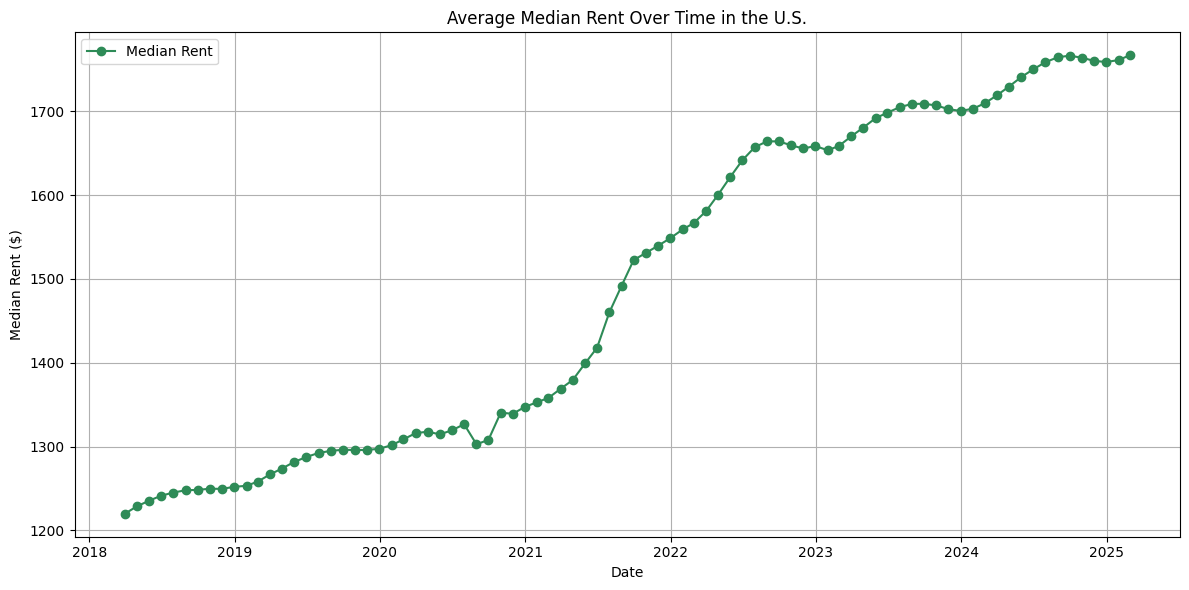

In [ ]:
import matplotlib.pyplot as plt

# Ensure the Date column is in datetime format
merged_cleaned["Date"] = pd.to_datetime(merged_cleaned["Date"])

# Calculate average Median Sale Price over time (nationwide)
price_trend = merged_cleaned.groupby("Date")["MedianSalePrice"].mean()

# Plot the time trend for Median Sale Price
plt.figure(figsize=(12, 6))
plt.plot(price_trend.index, price_trend.values, marker='o', label="Median Sale Price", color='royalblue')
plt.title("Average Median Sale Price Over Time in the U.S.")
plt.xlabel("Date")
plt.ylabel("Median Sale Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate average Median Rent over time (nationwide)
rent_trend = merged_cleaned.groupby("Date")["MedianRent"].mean()

# Plot the time trend for Median Rent
plt.figure(figsize=(12, 6))
plt.plot(rent_trend.index, rent_trend.values, marker='o', label="Median Rent", color='seagreen')
plt.title("Average Median Rent Over Time in the U.S.")
plt.xlabel("Date")
plt.ylabel("Median Rent ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**HYPOTHESIS 1**



K-means clustering using Median Sale Price and Sale-to-List Ratio performed.
High-priced areas (Cluster 0) tend to sell around the list price (ratio ≈ 1.00),
while mid-priced areas (Cluster 1) even slightly exceed the list price (ratio > 1.00).
Low-priced areas (Cluster 2) are more likely to sell below list price.
This may indicate different levels of market competition, could support Hypothesis 3.

**FOR NEW CONSTRUCTION MEDIAN SALE PRICE**

In [ ]:
#Trying to find correlation between NewConMedianSalePrice variable with MedianSalePrice
from scipy.stats import pearsonr

subset_corr = merged_cleaned[['MedianSalePrice', 'NewConMedianSalePrice']].dropna()

r1, p1 = pearsonr(subset_corr['MedianSalePrice'], subset_corr['NewConMedianSalePrice'])

print("Correlation between Median Sale Price and NewConMedianSalePrice:")
print(f"Pearson r = {r1:.2f} | p-value = {p1:.4f}")

Correlation between Median Sale Price and NewConMedianSalePrice:
Pearson r = 0.89 | p-value = 0.0000


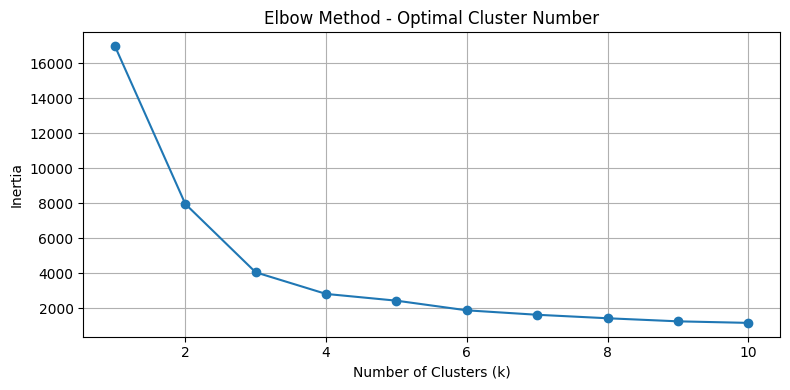

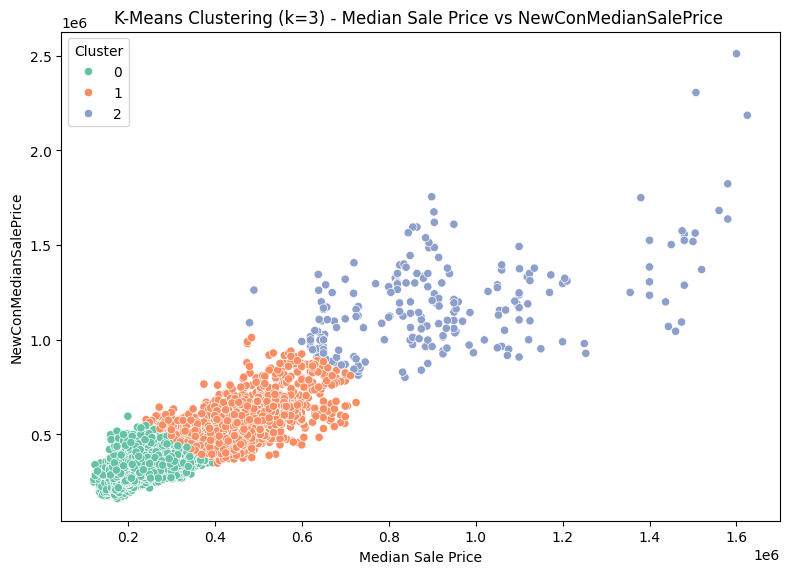

Cluster Summary:
          MedianSalePrice  NewConMedianSalePrice
Cluster                                        
0              241471.49              330942.49
1              436789.65              528787.91
2              925075.67             1183145.89


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X = merged_cleaned[['MedianSalePrice', 'NewConMedianSalePrice']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method - Optimal Cluster Number')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

X_clustered = X.copy()
X_clustered['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_clustered, x='MedianSalePrice', y='NewConMedianSalePrice', hue='Cluster', palette='Set2')
plt.title(f'K-Means Clustering (k={optimal_k}) - Median Sale Price vs NewConMedianSalePrice ')
plt.xlabel('Median Sale Price')
plt.ylabel('NewConMedianSalePrice')
plt.tight_layout()
plt.show()

cluster_summary = X_clustered.groupby('Cluster').mean().round(2)
print("Cluster Summary:\n", cluster_summary)

Strong positive correlation (r = 0.89, p < 0.001) between the median sale price and the median sale price of new constructions.
This suggests that newly built homes tend to follow overall market prices, which may reflect broader urban price pressure as described in Hypothesis 3.

**FOR MEAN SALE TO LIST RATIO**

**Additional Analysis**

In [ ]:
#Trying to find correlation between Mean_Sale_to_List variable with MedianSalePrice
from scipy.stats import pearsonr

subset_corr = merged_cleaned[['MedianSalePrice', 'SaleToListRatio']].dropna()

r1, p1 = pearsonr(subset_corr['MedianSalePrice'], subset_corr['SaleToListRatio'])

print("Correlation between Median Sale Price and SaleToListRatio:")
print(f"Pearson r = {r1:.2f} | p-value = {p1:.4f}")

Correlation between Median Sale Price and SaleToListRatio:
Pearson r = 0.48 | p-value = 0.0000


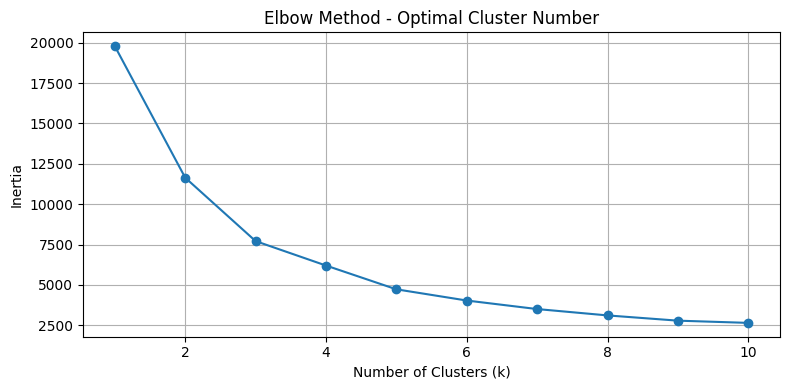

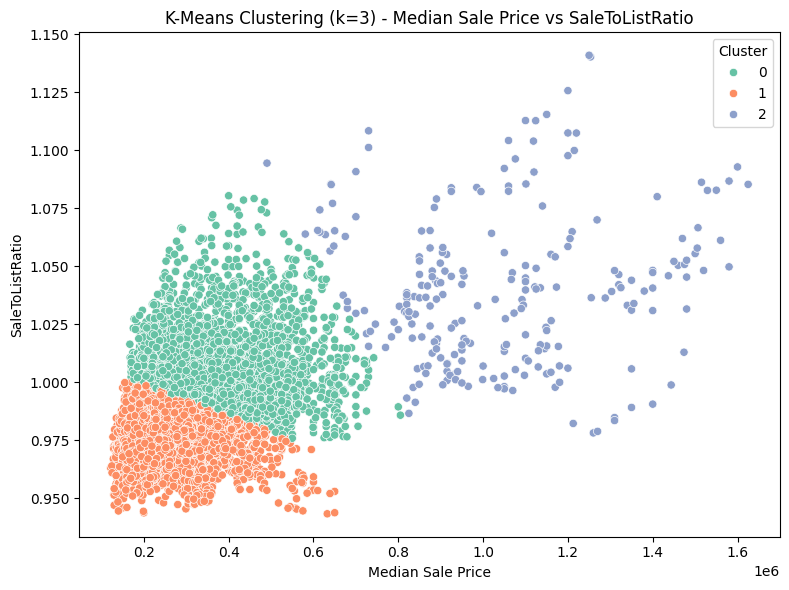

Cluster Summary:
          MedianSalePrice  SaleToListRatio
Cluster                                  
0              369528.39             1.01
1              248729.81             0.98
2             1040987.57             1.04


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X = merged_cleaned[['MedianSalePrice', 'SaleToListRatio']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method - Optimal Cluster Number')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

X_clustered = X.copy()
X_clustered['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_clustered, x='MedianSalePrice', y='SaleToListRatio', hue='Cluster', palette='Set2')
plt.title(f'K-Means Clustering (k={optimal_k}) - Median Sale Price vs SaleToListRatio')
plt.xlabel('Median Sale Price')
plt.ylabel('SaleToListRatio')
plt.tight_layout()
plt.show()

cluster_summary = X_clustered.groupby('Cluster').mean().round(2)
print("Cluster Summary:\n", cluster_summary)

**HYPOTHESIS 2**

In [ ]:
#Trying to find correlation between MarketHeatIndex variable with PctSoldAboveList
from scipy.stats import pearsonr

subset_corr = merged_cleaned[['MarketHeatIndex', 'PctSoldAboveList']].dropna()

r1, p1 = pearsonr(subset_corr['MarketHeatIndex'], subset_corr['PctSoldAboveList'])

print("Correlation between MarketHeatIndex and PctSoldAboveList:")
print(f"Pearson r = {r1:.2f} | p-value = {p1:.4f}")

Correlation between MarketHeatIndex and PctSoldAboveList:
Pearson r = 0.70 | p-value = 0.0000


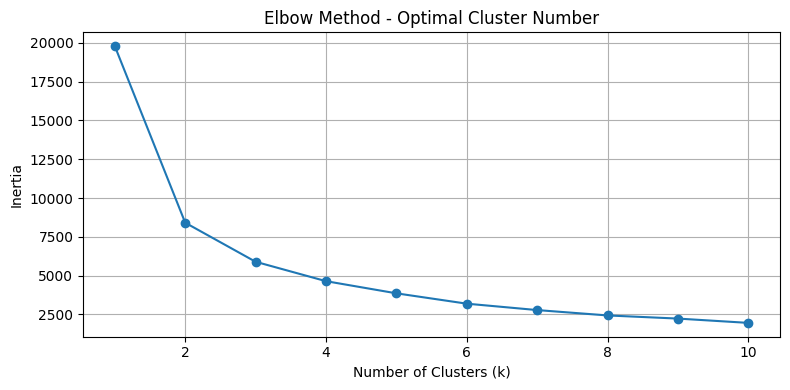

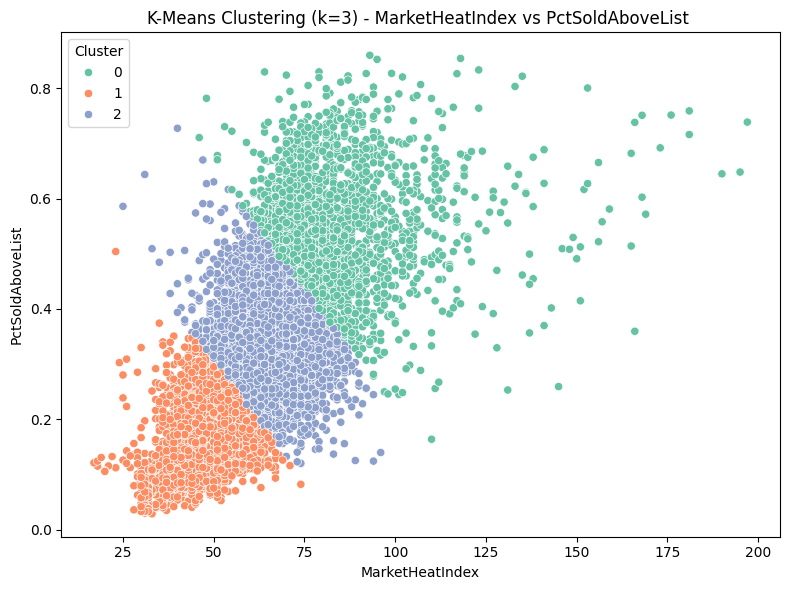

Cluster Summary:
          MarketHeatIndex  PctSoldAboveList
Cluster                                   
0                  84.56              0.54
1                  48.11              0.17
2                  64.46              0.34


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X = merged_cleaned[['MarketHeatIndex', 'PctSoldAboveList']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method - Optimal Cluster Number')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

X_clustered = X.copy()
X_clustered['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_clustered, x='MarketHeatIndex', y='PctSoldAboveList', hue='Cluster', palette='Set2')
plt.title(f'K-Means Clustering (k={optimal_k}) - MarketHeatIndex vs PctSoldAboveList ')
plt.xlabel('MarketHeatIndex')
plt.ylabel('PctSoldAboveList')
plt.tight_layout()
plt.show()

cluster_summary = X_clustered.groupby('Cluster').mean().round(2)
print("Cluster Summary:\n", cluster_summary)

In [ ]:
# Downloading clean dataset
merged_cleaned.to_csv("merged_cleaned.csv", index=False)
from google.colab import files
files.download("merged_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>